In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
diabetes = pd.read_csv('diabetes.csv')

In [4]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import sklearn.metrics as metrics

In [34]:
clf = tree.DecisionTreeClassifier(random_state=0)

In [35]:
X = diabetes.iloc[:,:-1]

In [36]:
y = diabetes.iloc[:,-1]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
y_train

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64

In [39]:
c1 = clf.fit(X_train, y_train)

In [40]:
c1

DecisionTreeClassifier(random_state=0)

In [61]:
pred1 = c1.predict(X_test)

In [62]:
pred1

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [63]:
print('tuning 전 accuracy:', metrics.accuracy_score(y_test,pred1).round(4))

tuning 전 accuracy: 0.7662


In [44]:
cn=['negative','positive']

In [45]:
import pydot

In [46]:
from IPython.core.display import Image 

In [47]:
dot_data = export_graphviz(c1, out_file = None,
                                feature_names = diabetes.columns[:-1],
                                class_names = cn,
                                filled = True, 
                                rounded = True, 
                                special_characters = True)

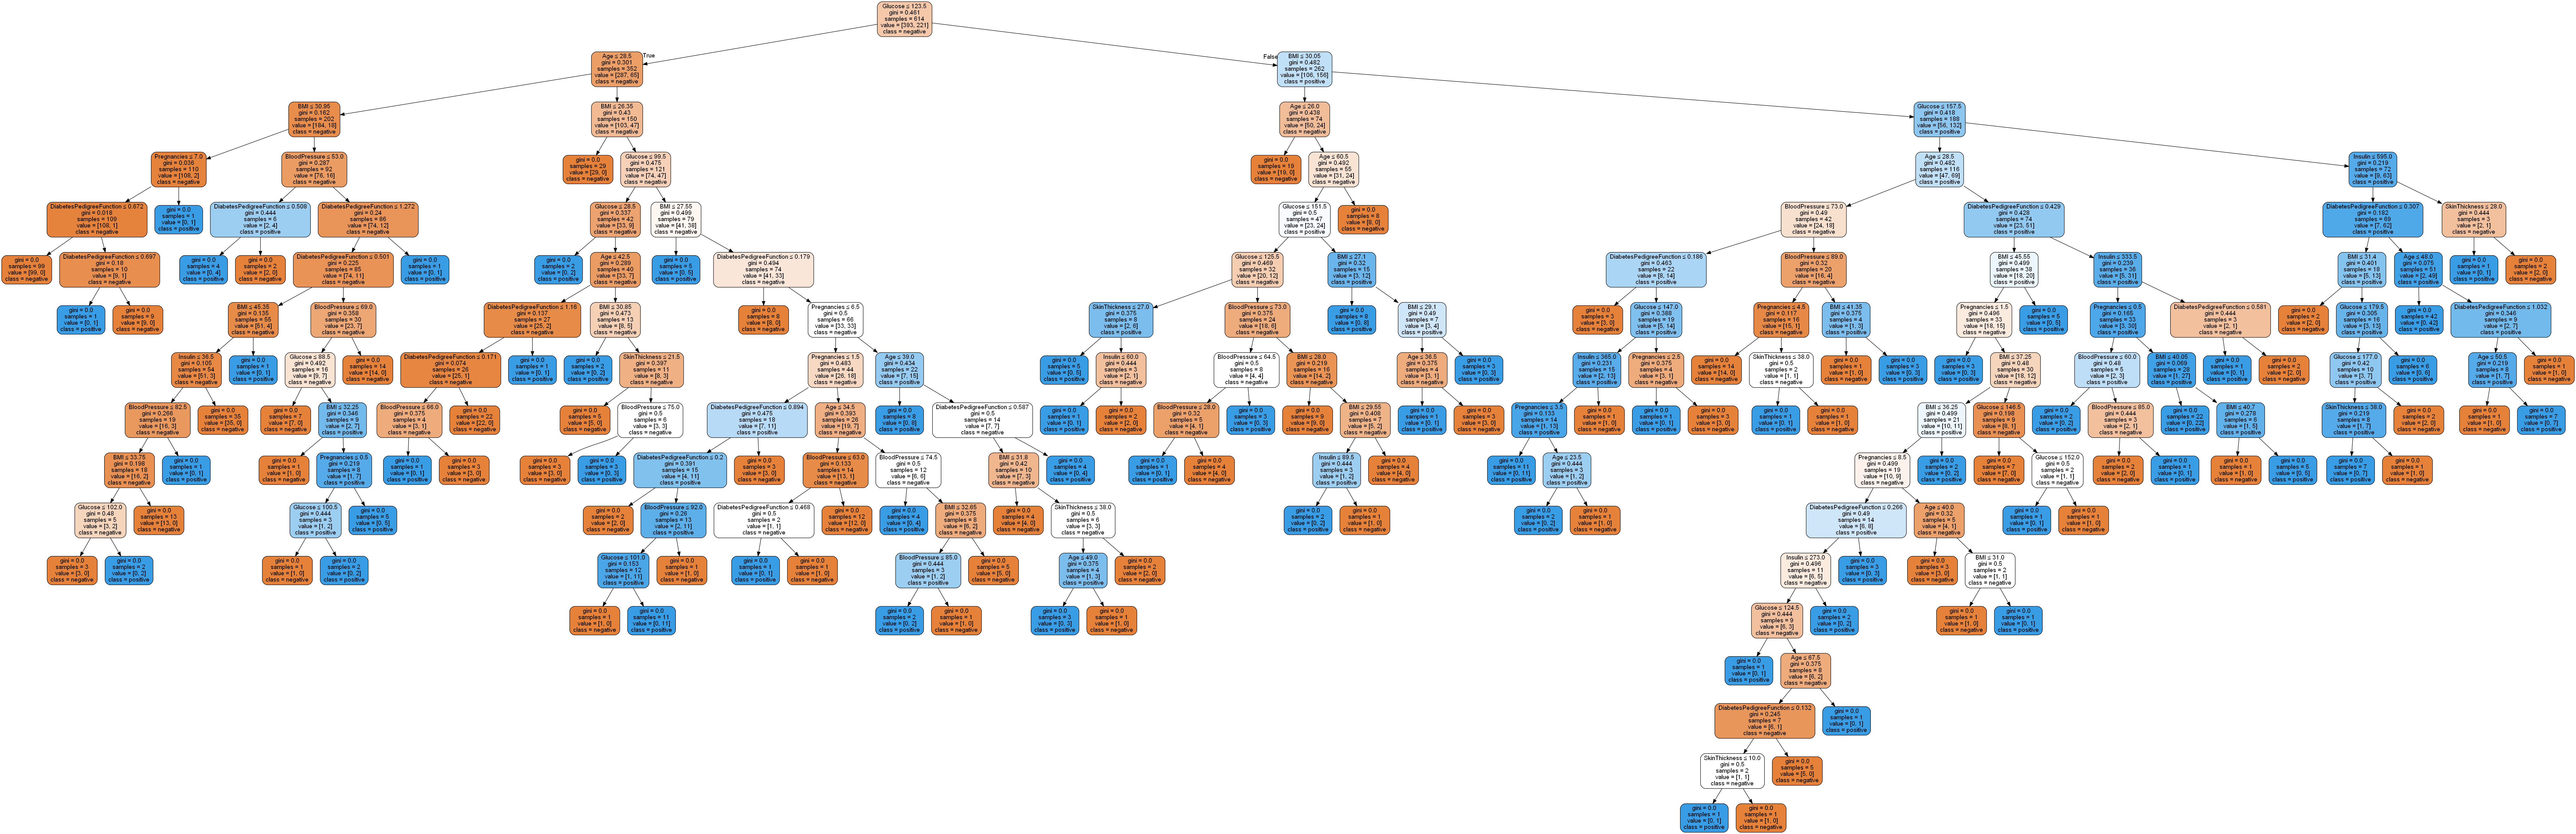

In [48]:
graph = pydot.graph_from_dot_data(dot_data)[0]
image = graph.create_png()
Image(image)

In [49]:
def draw_decision_tree(clf, feature_names = None, class_names = None):
    dot_data = export_graphviz(clf, out_file = None, 
                                feature_names = feature_names,
                                class_names = class_names,
                                filled = True, 
                                rounded = True,
                                special_characters = True)
    graph = pydot.graph_from_dot_data(dot_data)[0]
    image = graph.create_png()
    return Image(image)

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
hyperparamters = {'max_depth': list(range(2, 8)),  'min_samples_split': list(range(2, 100))}

In [52]:
GridCV = GridSearchCV(estimator=c1, param_grid=hyperparamters, cv=5, verbose=1)

GridCV.fit(X_train, y_train)
GridCV.best_params_

Fitting 5 folds for each of 588 candidates, totalling 2940 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2940 out of 2940 | elapsed:   18.1s finished


{'max_depth': 5, 'min_samples_split': 97}

In [53]:
tuned = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=97, random_state=0)

In [54]:
c2 = tuned.fit(X_train, y_train)

In [55]:
c2

DecisionTreeClassifier(max_depth=5, min_samples_split=97, random_state=0)

In [71]:
feature_names=diabetes.columns[:-1]

In [72]:
class_names=cn

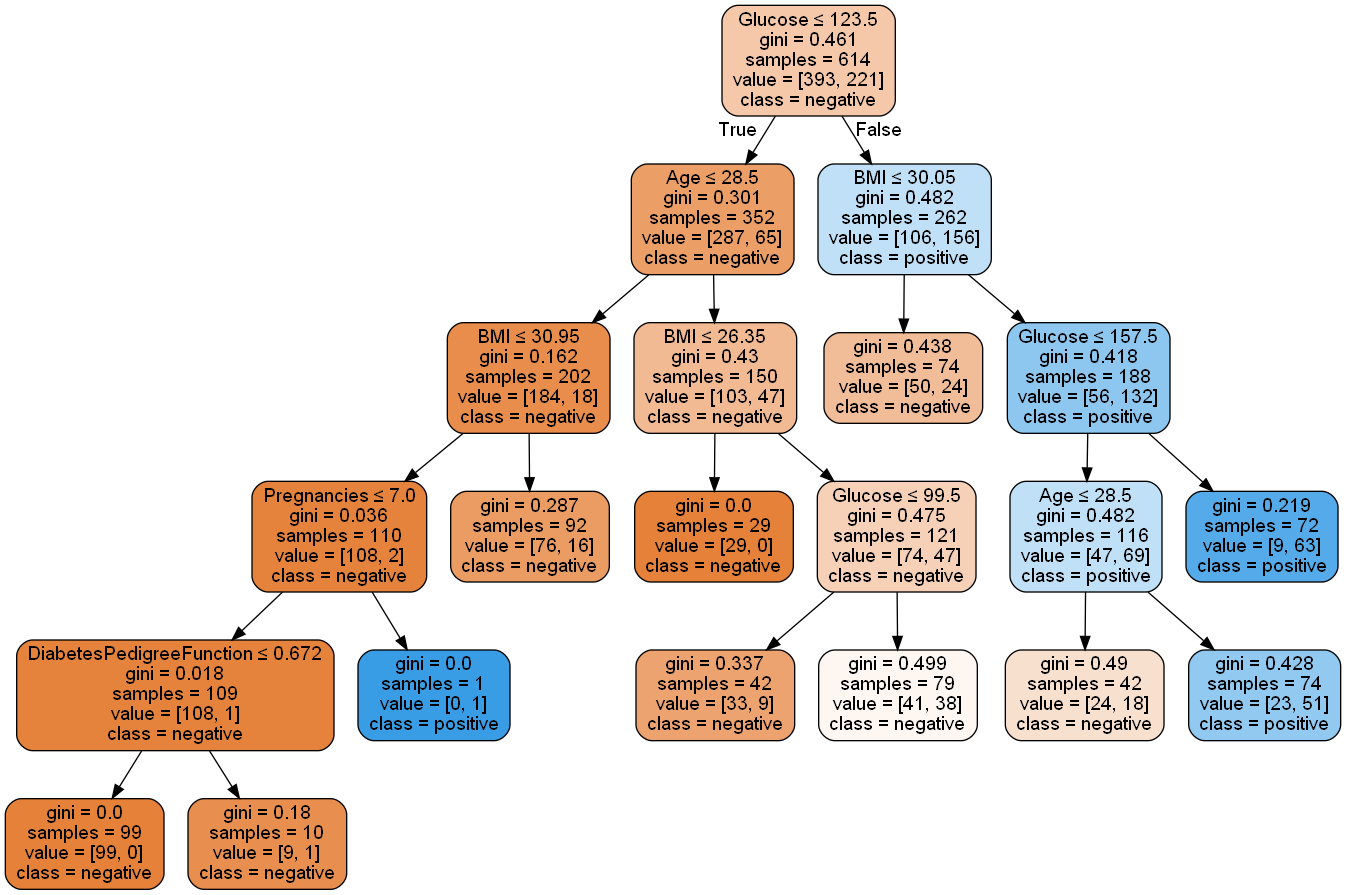

In [73]:
draw_decision_tree(c2, feature_names=feature_names, class_names = class_names)

In [64]:
pred2 = c2.predict(X_test)

In [65]:
print('tuning 후 accuracy:', metrics.accuracy_score(y_test,pred2).round(4))

tuning 후 accuracy: 0.7792
